# RASCUNHOS

trabalho 01 de computação numerica

soma compensada de kahan

In [ ]:
#um somatorio normal que vai gerar um erro de precisão

def floaterro(n, tamanho):
  soma=0
  for y in range(tamanho):
    soma=soma+n
  return soma


#erros de arredondamento temos perda de valores
#numero de vezes que o valor vai ser somado
entrada=int(input())
#entrad com valores em float
#usar como caso base o valor 0.1
somatorio=float(input())
print(floaterro(somatorio,entrada))


10
0.1
0.9999999999999999


Algoritmo de soma compensada

In [ ]:
def soma_kahan(n, valor):
  soma=0.0
  e=0.0

  for i in range(n):

      y = valor - e
      t = soma + y
      #o valor onde o erro fica armazenado
      e = t - soma - y
      soma = t

  return soma

#quantidade de vezes que sera somado
n=int(input())
#valor em ponto flutuante
valor_float=float(input())
#saida do codigo
#
print(soma_kahan(n,valor_float))

10
0.1
1.0


Comparação de valores com e sem o "metodo de kahan"

In [ ]:

def floaterro(n, tamanho):
  soma=0
  for _ in range(n):
    soma+=tamanho
  return soma


def soma_kahan(n, valor):
  soma=0.0
  e=0.0

  for _ in range(n):

      y = valor - e
      t = soma + y
      #o valor onde o erro fica armazenado
      e = t - soma - y
      soma = t

  return soma

def comparando_valores(n, entrada):
  somatorio=floaterro(n,int(entrada))
  metodo_kahan=soma_kahan(n, entrada)


  #relativo_erro_somatorio= (somatorio-metodo_kahan)/ metodo_kahan *100
  diferença_valor = somatorio-metodo_kahan
  return diferença_valor
  #return relativo_erro_somatorio

valor=int(input())
v_float=float(input())
print(f"o valor pelo meotodo de ponto fluatante foi:{floaterro(valor, v_float)}")
print(f"o valor pelo algoritimo de soma de kahan foi:{soma_kahan(valor, v_float)}")
resultado=comparando_valores(valor, v_float)
print(f"Diferença do valor de comparação foi: {resultado}")


10
0.1
o valor pelo meotodo de ponto fluatante foi:0.9999999999999999
o valor pelo algoritimo de soma de kahan foi:1.0
Diferença do valor de comparação foi: -1.0


o algoritimo de kahan funciona atribuindo o erro para uma variavel "temporaria" logo com isso ele faz uma subtração com o proximo valor e atribui ao somatorio ate n vezes

rascunho de prog objeto

In [ ]:
import math
def volume(n):
  pi = 3.14159
  volume_calculo = (4/3)* pi*math.pow(n,3);
  return volume_calculo
entrada=float(input())
print(volume(entrada))

5
523.5983333333332


algoritimo para o calculo para a serie de taylor

In [ ]:
#calculo da serie de talyor

import math
def seres_of_taylor(i, n):

    x=n
    soma=0
    for n in range(0, i+1):
        soma+=math.pow(x,n)/math.factorial(n)
    return soma

entrada=int(input())
#define o valor n que como padrao sempre usa 0.5
tamanho_n=float(input())
print(f"valor da serie:{seres_of_taylor(entrada, tamanho_n)}")

10
0.5
valor da serie:1.6487212706873655


resolução da questão 4

In [ ]:
import math

def serie_taylor(f, x0, x, n):
    """
    Calcula a série de Taylor de uma função f em torno de x0,
    avaliada em x, até a ordem n.

    Parâmetros:
    f (função): função a ser aproximada
    x0 (float): ponto em torno do qual a série é calculada
    x (float): ponto em que a série é avaliada
    n (int): ordem da série

    Retorna:
    float: valor da série de Taylor em x
    """
    resultado = 0
    for i in range(n+1):
        # Calcula a derivada de ordem i da função f em x0
        derivada = derivada_ordem_i(f, x0, i)

        # Calcula o termo da série de Taylor
        termo = (derivada / math.factorial(i)) * (x - x0)**i

        # Adiciona o termo ao resultado
        resultado += termo

    return resultado

def derivada_ordem_i(f, x, i):
    """
    Calcula a derivada de ordem i da função f em x.

    Parâmetros:
    f (função): função a ser derivada
    x (float): ponto em que a derivada é calculada
    i (int): ordem da derivada

    Retorna:
    float: valor da derivada em x
    """
    if i == 0:
        return f(x)
    else:
        # Calcula a derivada da função f em x
        h = 1e-6
        derivada = (f(x + h) - f(x - h)) / (2 * h)

        # Calcula a derivada de ordem i-1 da função f em x
        return derivada_ordem_i(lambda x: derivada, x, i-1)

# Exemplo de uso:
def f(x):
    return math.exp(x)

x0 = 0
x = 1
n = 5

resultado = serie_taylor(f, x0, x, n)
print("Série de Taylor:", resultado)
print("Valor exato:", f(x))

Série de Taylor: 1.9999999999732445
Valor exato: 2.718281828459045


In [ ]:
import sympy as sp

# Definir a variável simbólica
x = sp.Symbol('x')

# Definir a função f(x) que queremos aproximar
# Exemplo: f(x) = x**3 - 4*x**2 + x - 6
f = x**3 - 4*x**2 + x - 6

# Definir o ponto de expansão x0
x0 = 2

# Calcular as derivadas de f(x) em relação a x
f_prime = sp.diff(f, x)  # Primeira derivada f'(x)
f_double_prime = sp.diff(f_prime, x)  # Segunda derivada f''(x)

# Avaliar f(x), f'(x) e f''(x) no ponto x0
f_x0 = f.subs(x, x0)
f_prime_x0 = f_prime.subs(x, x0)
f_double_prime_x0 = f_double_prime.subs(x, x0)

# Definir a aproximação de Taylor de segunda ordem
taylor_approx = f_x0 + f_prime_x0 * (x - x0) + (f_double_prime_x0 / 2) * (x - x0)**2

# Exibir a expansão de Taylor
print(f"Expansão de Taylor de f(x) em torno de x0 = {x0}:")
print(taylor_approx)

# Converter a expressão para uma função numérica para avaliação
taylor_func = sp.lambdify(x, taylor_approx)

# Testar a aproximação em um valor de x
x_value = 2.1
print(f"\nAproximação de f({x_value}) usando Taylor: {taylor_func(x_value)}")

# Comparar com o valor exato de f(x)
f_exact = sp.lambdify(x, f)  # Converter f(x) para função numérica
print(f"Valor exato de f({x_value}): {f_exact(x_value)}")

Expansão de Taylor de f(x) em torno de x0 = 2:
-3*x + 2*(x - 2)**2 - 6

Aproximação de f(2.1) usando Taylor: -12.280000000000001
Valor exato de f(2.1): -12.279



Para dx = 0.1:
  Em x0 = 0.0000:
    f'(x0) aproximado: 2.700230, exato: 2.718282, erro: 1.805186e-02
    f''(x0) aproximado: 0.000000, exato: 0.000000, erro: 0.000000e+00
  Em x0 = 1.5708:
    f'(x0) aproximado: -0.994998, exato: -1.000000, erro: 5.002457e-03
    f''(x0) aproximado: -0.006651, exato: -0.000000, erro: 6.651108e-03
  Em x0 = 3.1416:
    f'(x0) aproximado: -0.369106, exato: -0.367879, erro: 1.226568e-03
    f''(x0) aproximado: 0.000000, exato: 0.000000, erro: 6.488372e-16

Para dx = 0.01:
  Em x0 = 0.0000:
    f'(x0) aproximado: 2.718101, exato: 2.718282, erro: 1.812118e-04
    f''(x0) aproximado: 0.000000, exato: 0.000000, erro: 0.000000e+00
  Em x0 = 1.5708:
    f'(x0) aproximado: -0.999950, exato: -1.000000, erro: 5.000025e-05
    f''(x0) aproximado: -0.000067, exato: -0.000000, erro: 6.666511e-05
  Em x0 = 3.1416:
    f'(x0) aproximado: -0.367892, exato: -0.367879, erro: 1.226268e-05
    f''(x0) aproximado: 0.000000, exato: 0.000000, erro: 4.505224e-17

Para dx = 0.

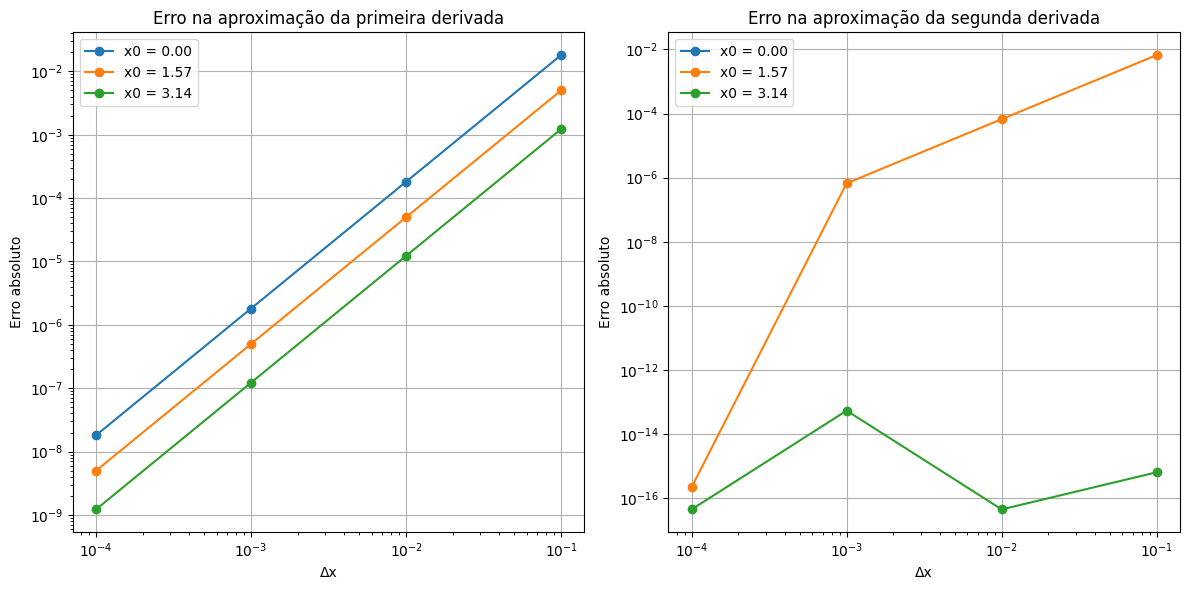

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def forward_difference(f, dx):
    return (f[1] - f[0]) / dx

def backward_difference(f, dx):
    return (f[-1] - f[-2]) / dx

def centered_difference(f, dx):
    return (f[2] - f[0]) / (2 * dx)

def three_point_endpoint(f, dx):
    return (-3*f[0] + 4*f[1] - f[2]) / (2 * dx)

def three_point_midpoint(f, dx):
    return (f[2] - f[0]) / (2 * dx)

def five_point_midpoint(f, dx):
    return (-f[4] + 8*f[3] - 8*f[1] + f[0]) / (12 * dx)

def second_derivative_centered(f, dx):
    return (f[2] - 2*f[1] + f[0]) / (dx**2)

def f(x):
    return math.exp(math.cos(x)) * math.sin(x)

def df(x):
    return math.exp(math.cos(x)) * (math.cos(x) - math.sin(x) * math.sin(x))

def d2f(x):
    return math.exp(math.cos(x)) * (
        -math.sin(x) - 2*math.cos(x)*math.sin(x)
        - math.sin(x)**2 * math.cos(x) + math.sin(x)**3
    )

def test_approximations(x0, dx):
    x = [x0 + i*dx for i in range(-2, 3)]
    f_values = [f(xi) for xi in x]

    approx_df = centered_difference(f_values[1:4], dx)
    approx_d2f = second_derivative_centered(f_values[1:4], dx)

    exact_df = df(x0)
    exact_d2f = d2f(x0)

    error_df = abs(approx_df - exact_df)
    error_d2f = abs(approx_d2f - exact_d2f)

    return approx_df, approx_d2f, exact_df, exact_d2f, error_df, error_d2f

# Pontos de teste e valores de dx
test_points = [0, math.pi/2, math.pi]
dx_values = [0.1, 0.01, 0.001, 0.0001]

# Armazenar resultados
results = {dx: {x0: {} for x0 in test_points} for dx in dx_values}

for dx in dx_values:
    for x0 in test_points:
        approx_df, approx_d2f, exact_df, exact_d2f, error_df, error_d2f = test_approximations(x0, dx)
        results[dx][x0] = {
            'approx_df': approx_df,
            'approx_d2f': approx_d2f,
            'exact_df': exact_df,
            'exact_d2f': exact_d2f,
            'error_df': error_df,
            'error_d2f': error_d2f
        }

# Imprimir resultados
for dx in dx_values:
    print(f"\nPara dx = {dx}:")
    for x0 in test_points:
        print(f"  Em x0 = {x0:.4f}:")
        r = results[dx][x0]
        print(f"    f'(x0) aproximado: {r['approx_df']:.6f}, exato: {r['exact_df']:.6f}, erro: {r['error_df']:.6e}")
        print(f"    f''(x0) aproximado: {r['approx_d2f']:.6f}, exato: {r['exact_d2f']:.6f}, erro: {r['error_d2f']:.6e}")

# Plotar erros
plt.figure(figsize=(12, 6))
for i, x0 in enumerate(test_points):
    errors_df = [results[dx][x0]['error_df'] for dx in dx_values]
    errors_d2f = [results[dx][x0]['error_d2f'] for dx in dx_values]

    plt.subplot(1, 2, 1)
    plt.loglog(dx_values, errors_df, 'o-', label=f'x0 = {x0:.2f}')
    plt.subplot(1, 2, 2)
    plt.loglog(dx_values, errors_d2f, 'o-', label=f'x0 = {x0:.2f}')

plt.subplot(1, 2, 1)
plt.title("Erro na aproximação da primeira derivada")
plt.xlabel("Δx")
plt.ylabel("Erro absoluto")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title("Erro na aproximação da segunda derivada")
plt.xlabel("Δx")
plt.ylabel("Erro absoluto")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()